<a href="https://colab.research.google.com/github/Dneth04/Green-Datathon-Mapping-Forest-Futures/blob/main/CodeAlong-SelfCoded.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GreenDatathon: Mapping Forest Futures

## Introduction and Event Overview

Welcome to the GreenDatathon: Mapping Forest Futures! This 3-hour data analysis challenge focuses on global forest trends from 1990 to 2020. Our goal is to introduce you to data manipulation and basic programming skills using real-world environmental data.


# Importing necessary libraries


In [17]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 1. Loading the data


In [18]:
# Load the dataset 'Forest_Area.csv' into a DataFrame named 'df'
# This step involves reading the CSV file using pandas and storing its contents in a variable called 'df'

df = pd.read_csv('Forest_Area.csv')

# OR uncomment and run the below two cells to upload the data (do only one!)
# from google.colab import files
# uploaded = files.upload()

# 2. Basic data exploration

In [5]:
# Print the first 5 rows of the DataFrame to get an overview of the data
print(df.head())

   CountryID Country and Area  Forest Area, 1990  Forest Area, 2000  \
0        NaN            WORLD         4236433.42         4158049.52   
1        4.0      Afghanistan            1208.44            1208.44   
2        8.0          Albania             788.80             769.30   
3       12.0          Algeria            1667.00            1579.00   
4       16.0   American Samoa              18.07              17.73   

   Forest Area, 2010 Forest Area, 2015  Forest Area, 2020  \
0         4106316.94                          4058930.81   
1            1208.44           1208.44            1208.44   
2             782.07            789.19             788.90   
3            1918.00              1956            1949.00   
4              17.43             17.28              17.13   

   Total Land Area, 2020  \
0             13003000.0   
1                65286.0   
2                 2740.0   
3               238174.0   
4                   20.0   

   Forest Area as a Proportion of Tot

In [6]:
# Print the first 10 rows of the DataFrame to get an overview of the data
print(df.head(10))

   CountryID     Country and Area  Forest Area, 1990  Forest Area, 2000  \
0        NaN                WORLD         4236433.42         4158049.52   
1        4.0          Afghanistan            1208.44            1208.44   
2        8.0              Albania             788.80             769.30   
3       12.0              Algeria            1667.00            1579.00   
4       16.0       American Samoa              18.07              17.73   
5       20.0              Andorra              16.00              16.00   
6       24.0               Angola           79262.78           77708.61   
7      660.0             Anguilla               5.50               5.50   
8       28.0  Antigua and Barbuda              10.11               9.45   
9       32.0            Argentina           35204.00           33378.00   

   Forest Area, 2010 Forest Area, 2015  Forest Area, 2020  \
0         4106316.94                          4058930.81   
1            1208.44           1208.44            12

In [ ]:
# Print the last 5 rows of the DataFrame to get an overview of the data
print(df.tail())

In [ ]:
# Print the last 10 rows of the DataFrame to get an overview of the data
print(df.tail(10))

## Data Cleaning & Data Handling

In [20]:
# Replace "..." with NaN to recognize them as missing values
df.replace("...", np.nan, inplace=True)

# Now, print the number of missing values in each column after replacement
print(df.isnull().sum())

# Remove rows with missing (NaN) values from the DataFrame
df = df.dropna()

CountryID                                               0
Country and Area                                        0
Forest Area, 1990                                       0
Forest Area, 2000                                       0
Forest Area, 2010                                       0
Forest Area, 2015                                       0
Forest Area, 2020                                       0
Total Land Area, 2020                                   0
Forest Area as a Proportion of Total Land Area, 2020    0
Deforestation, 2015-2020                                0
Total Forest Area Affected by Fire, 2015                0
dtype: int64


# 4. Basic data manipulation

In [21]:
# Calculate the change in forest area from 1990 to 2020 and store it in a new column
df['Forest_Change_1990_2020'] = df['Forest Area, 2020'] - df['Forest Area, 1990']

avg_change = df['Forest_Change_1990_2020'].mean() # Calculate the (MEAN) average change in forest area between 1990 and 2020
print(f"Average forest area change between 1990 and 2020: {avg_change:.2f} thousand hectares")  # Print the average change

Average forest area change between 1990 and 2020: -762.83 thousand hectares


# 5. Data visualization


In [9]:
# 'WORLD'?
# countries_only = df[df['Country and Area'] != 'WORLD']

# Now select the top 10 countries with the largest forest area in 2020
top_10 = df.nlargest(10, 'Forest Area, 2020')

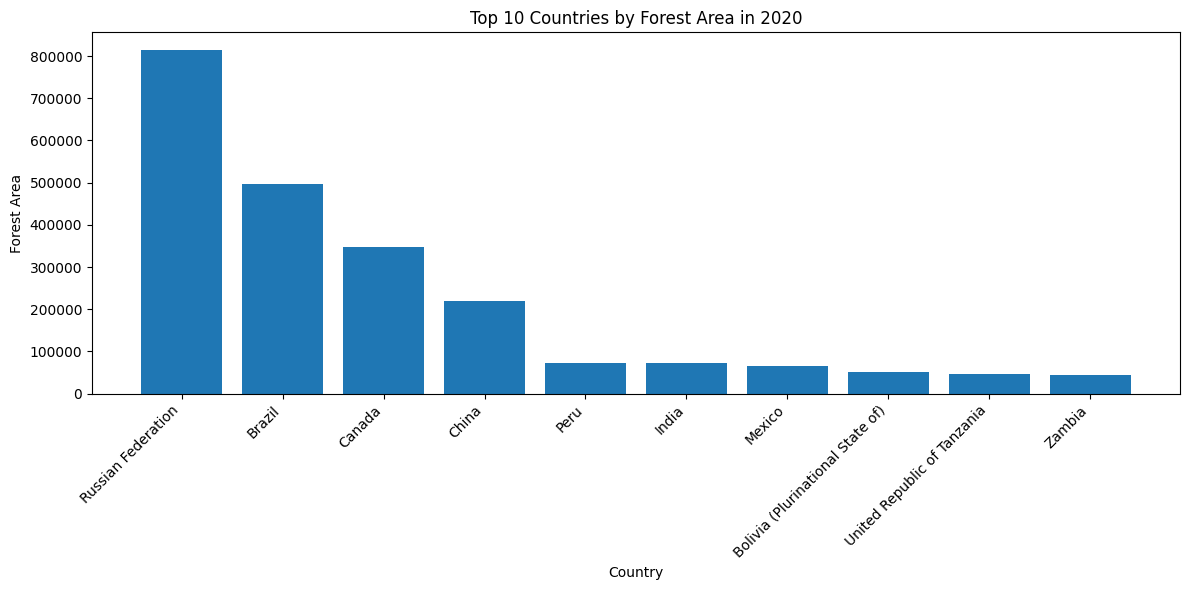

In [22]:
# Set the figure size for the plot
plt.figure(figsize=(12, 6)) # 12, width - 6, height of the figure

# Create a bar plot showing the top 10 countries by forest area in 2020
plt.bar(top_10['Country and Area'], top_10['Forest Area, 2020'])
plt.title('Top 10 Countries by Forest Area in 2020')  # Set the title of the plot
plt.xlabel('Country')  # Label the x-axis as 'Country'
plt.ylabel('Forest Area')  # Label the y-axis as 'Forest Area'

plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust the layout to make sure everything fits without overlapping

plt.show()  # Display the plot

# 6. Prediction and analysis


In [23]:
countries = df['Country and Area'].values

In [24]:
def graphing_plot(country):
  country_data = df[df['Country and Area']==country]  # Filter the DataFrame for data related to your country

  # Define the years of interest
  years = [1990,2000,2010,2020]  # You can add more years
  forest_areas = country_data[['Forest Area, 1990', 'Forest Area, 2000', 'Forest Area, 2010', 'Forest Area, 2020']].values.flatten()  # Extract forest area data for the specified years

  # Reshape the years data to fit the model
  X = np.array(years).reshape(-1,1)
  y = forest_areas

  # Create an instance of the LinearRegression model
  model = LinearRegression()  # Initialize the model
  model.fit(X, y)  # Fit the model with the data

  # Predict the forest area for the year 2030
  prediction_2030 = model.predict([[2030]])  # Make sure the input format matches the training data

  # Set the figure size for the plot
  plt.figure(figsize=(10,6))  # Adjust the size for better visibility
  plt.scatter(years, forest_areas,color='blue',label='Actual Data')  # Plot the actual data as a scatter plot
  plt.plot(years, model.predict(X),color='red',label='Linear Regrssion')  # Plot the linear regression line
  plt.scatter([2030],prediction_2030 , color='green',label='2030 Prediction')  # Plot the prediction for 2030 as a scatter point

  plt.title(f'Forest Area Prediction for {country}')  # Set the title of the plot
  plt.xlabel('year')  # Label the x-axis as 'Year'
  plt.ylabel('Forest area')  # Label the y-axis as 'Forest Area (1000 ha)'
  plt.legend()  # Display the legend
  plt.grid(True)  # Enable the grid for better readability
  plt.show()  # Display the plot


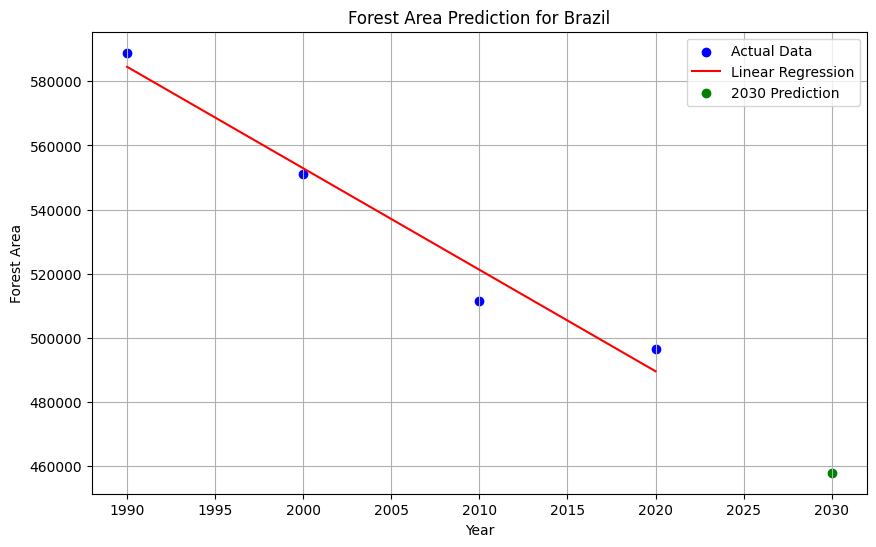

Predicted forest area for Brazil in 2030: 457960.95 thousand hectares
Rate of change: -3163.43 thousand hectares per year


In [12]:
# Reshape the years data to fit the model
X = np.array(years).reshape(-1, 1)
y = forest_areas

# Create an instance of the LinearRegression model
model = LinearRegression()  # Initialize the model
model.fit(X, y)  # Fit the model with the data

# Predict the forest area for the year 2030
prediction_2030 = model.predict([[2030]])  # Make sure the input format matches the training data

# Set the figure size for the plot
plt.figure(figsize=(10, 6))  # Adjust the size for better visibility
plt.scatter(years, forest_areas, color='blue', label='Actual Data')  # Plot the actual data as a scatter plot
plt.plot(years, model.predict(X), color='red', label='Linear Regression')  # Plot the linear regression line
plt.scatter([2030], prediction_2030, color='green', label='2030 Prediction')  # Plot the prediction for 2030 as a scatter point

plt.title(f'Forest Area Prediction for {country}')  # Set the title of the plot
plt.xlabel('Year')  # Label the x-axis as 'Year'
plt.ylabel('Forest Area')  # Label the y-axis as 'Forest Area (1000 ha)'
plt.legend()  # Display the legend
plt.grid(True)  # Enable the grid for better readability
plt.show()  # Display the plot

# Print the predicted forest area for your country in 2030
print(f"Predicted forest area for {country} in 2030: {prediction_2030[0]:.2f} thousand hectares")  # Format the output for clarity
# Print the rate of change per year according to the model
print(f"Rate of change: {model.coef_[0]:.2f} thousand hectares per year")  # Shows the slope of the linear regression line

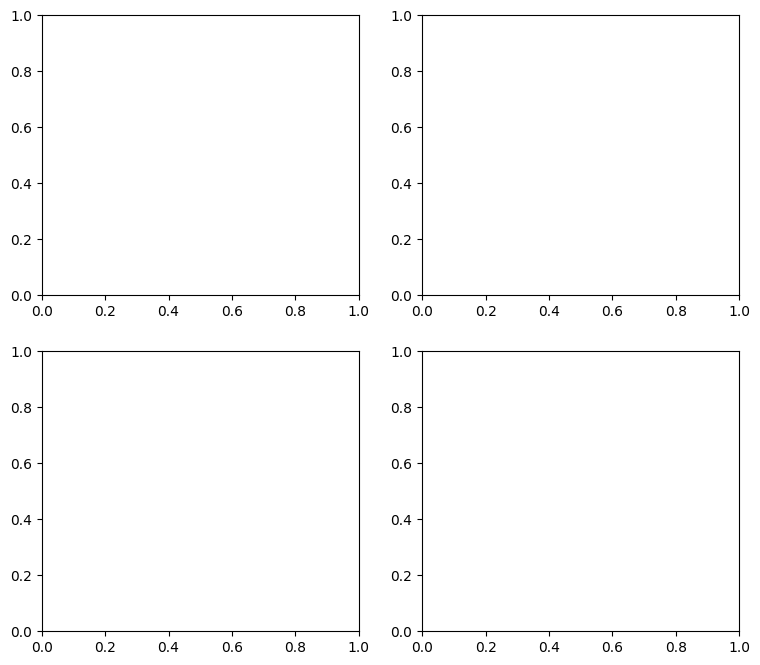

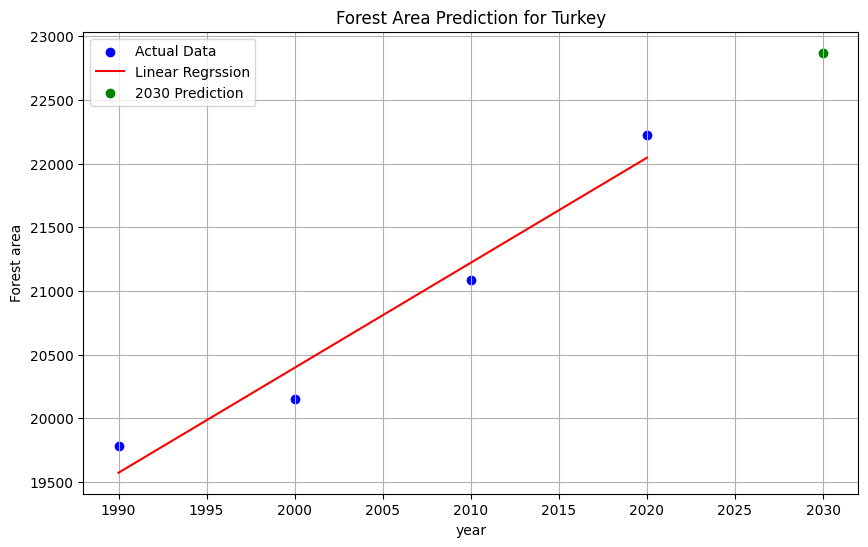

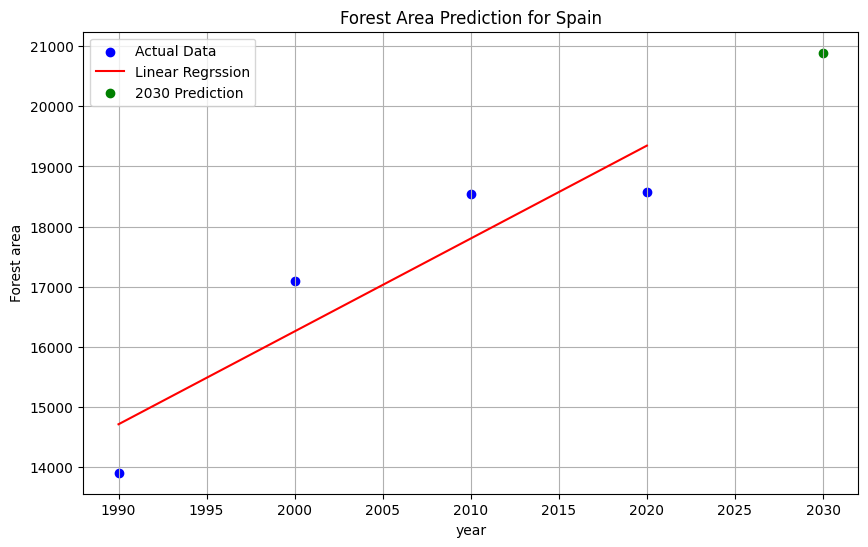

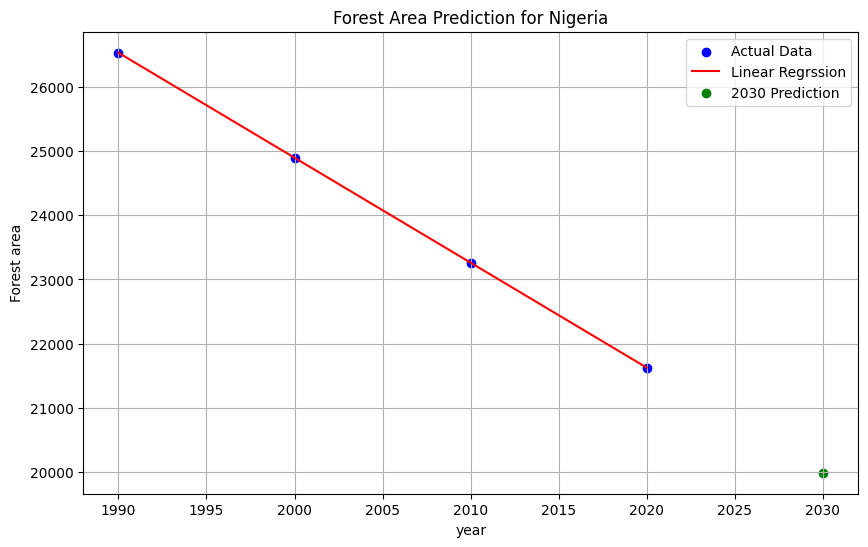

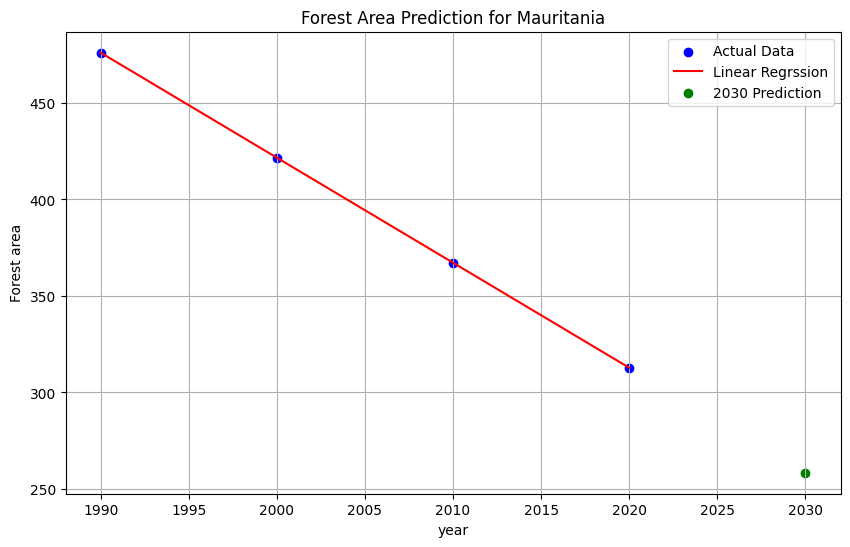

In [26]:
fig, axes = plt.subplots(2, 2, figsize=(9, 8))


countries = ['Turkey','Spain','Nigeria','Mauritania']
# Plotting on each subplot
for i, ax in enumerate(axes.flat):
  graphing_plot(countries[i])
